In [24]:
import pandas as pd
df = pd.read_csv('alien_saucers.csv')
df['datetime']=pd.to_datetime(df['datetime'])

In [25]:
df_actual = df[['date','datetime','SACTMIN']].dropna()
df_actual

,date,datetime,SACTMIN
79,06/30/2018,2018-06-30 15:54:45,37.0
87,06/30/2018,2018-06-30 16:29:12,49.0
141,06/30/2018,2018-06-30 22:05:30,50.0
142,06/30/2018,2018-06-30 22:05:30,53.0
169,07/01/2018,2018-07-01 07:16:38,27.0
...,...,...,...
129198,12/24/2021,2021-12-24 09:37:39,22.0
129463,12/26/2021,2021-12-26 08:42:36,5.0
129545,12/26/2021,2021-12-26 16:40:10,15.0
129563,12/26/2021,2021-12-26 18:19:16,23.0


In [26]:
df_posted = df[['date','datetime','SPOSTMIN']].dropna()
df_posted

,date,datetime,SPOSTMIN
0,06/30/2018,2018-06-30 07:44:06,150.0
1,06/30/2018,2018-06-30 07:51:06,150.0
2,06/30/2018,2018-06-30 07:58:07,150.0
3,06/30/2018,2018-06-30 08:02:08,150.0
4,06/30/2018,2018-06-30 08:07:28,150.0
...,...,...,...
129871,12/28/2021,2021-12-28 20:35:31,10.0
129872,12/28/2021,2021-12-28 20:42:17,10.0
129873,12/28/2021,2021-12-28 20:48:14,10.0
129874,12/28/2021,2021-12-28 20:48:32,5.0


In [27]:
#df_actual['datetime']=df_actual['datetime'].dt.round('15min')
df_actual['datetime']=df_actual['datetime'].dt.round('D')

In [28]:
df_actual

,date,datetime,SACTMIN
79,06/30/2018,2018-07-01,37.0
87,06/30/2018,2018-07-01,49.0
141,06/30/2018,2018-07-01,50.0
142,06/30/2018,2018-07-01,53.0
169,07/01/2018,2018-07-01,27.0
...,...,...,...
129198,12/24/2021,2021-12-24,22.0
129463,12/26/2021,2021-12-26,5.0
129545,12/26/2021,2021-12-27,15.0
129563,12/26/2021,2021-12-27,23.0


In [29]:
df_actual_mean = df_actual.groupby(by=['datetime']).mean()
df_actual_mean['dates'] = df_actual_mean.index
df_actual_mean

,SACTMIN,dates
datetime,,
2018-07-01,44.125,2018-07-01
2018-07-02,32.375,2018-07-02
2018-07-03,19.250,2018-07-03
2018-07-04,13.000,2018-07-04
2018-07-05,22.400,2018-07-05
...,...,...
2021-12-23,15.000,2021-12-23
2021-12-24,22.000,2021-12-24
2021-12-26,5.000,2021-12-26


In [30]:
df_posted['SPOSTMIN'].unique()

array([ 150.,  130.,  135.,  100.,  140.,   90.,   70.,  120.,  160.,
        190.,   80., -999.,  115.,   75.,  105.,   85.,   50.,   60.,
          5.,   10.,   20.,   30.,   45.,   65.,   95.,   55.,  110.,
         40.,   35.,   15.,   25.,  125.,    0.])

In [31]:
df_posted = df_posted[df_posted.SPOSTMIN != -999]
df_posted['datetime']=df_posted['datetime'].dt.round(freq = 'D')
df_posted_mean = df_posted.groupby(by=['datetime']).mean()
df_posted_mean['dates']=df_posted_mean.index

In [32]:
df_posted_mean

,SPOSTMIN,dates
datetime,,
2018-06-30,132.906977,2018-06-30
2018-07-01,89.350649,2018-07-01
2018-07-02,55.422078,2018-07-02
2018-07-03,60.472973,2018-07-03
2018-07-04,43.918919,2018-07-04
...,...,...
2021-12-25,31.082090,2021-12-25
2021-12-26,32.408759,2021-12-26
2021-12-27,33.040541,2021-12-27


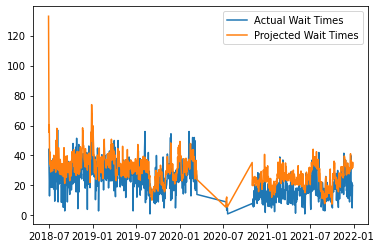

In [33]:
import matplotlib.pyplot as plt
x1 = df_actual_mean['dates']
y1 = df_actual_mean['SACTMIN']
x2 = df_posted_mean['dates']
y2 = df_posted_mean['SPOSTMIN']

plt.plot(x1,y1, label = 'Actual Wait Times')
plt.plot(x2,y2, label = 'Projected Wait Times')
plt.legend()
plt.show()